# <span style="color:orange">Appliquer le code du Baromètre de la Science Ouverte aux données de l'UCA</span>

Une fois que l'on dispose de sa liste de DOI nettoyée (voir le notebook "nettoyage_donnees"), il est à présent temps d'appliquer le code du Baromètre national de la Science Ouverte aux données de son propre établissement.

## <span style="color:orange">Importer des scripts</span>

In [1]:
from scanr_utils import *
from unpwaywall_utils import *

## <span style="color:orange">Importer dans le notebook les données préalablement traitées</span>

In [2]:
df_complete = pd.read_csv("Data/outputs/publis_completes.csv",sep=",")

In [3]:
df_complete

,doi,oa_type,is_oa,title,published_date,published_year,genre,journal_is_in_doaj,journal_issns,journal_name,publisher,scientific_field
0,10.1016/j.bmc.2017.08.043,closed,False,Linker structure-activity relationships in flu...,2017-10-01,2017.0,journal-article,False,0968-0896,Bioorganic & Medicinal Chemistry,Elsevier BV,Medical research
1,10.1007/jhep06(2017)047 10.1007/jhep10(2017)068,publisher;repository,True,Measurement of the J/ψ pair production cross-s...,2017-06-01,2017.0,journal-article,True,1029-8479,Journal of High Energy Physics,Springer Science and Business Media LLC,unknown
2,10.1007/jhep05(2017)158,publisher;repository,True,Search for the B s 0 → η′ϕ decay,2017-05-01,2017.0,journal-article,True,1029-8479,Journal of High Energy Physics,Springer Science and Business Media LLC,"Physical sciences, Astronomy"
3,10.1016/j.mednuc.2017.02.061,closed,False,Radiomarquage du NTP 15-5 ciblant les protéogl...,2017-05-01,2017.0,journal-article,False,0928-1258,Médecine Nucléaire,Elsevier BV,Medical research
4,10.15122/isbn.978-2-406-06967-6.p.0177,closed,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Humanities
...,...,...,...,...,...,...,...,...,...,...,...,...
4649,10.1182/blood-2018-99-119656,publisher,True,The Management of Cardiovascular Diseases in P...,2018-11-29,2018.0,journal-article,False,"0006-4971,1528-0020",Blood,American Society of Hematology,Medical research
4650,10.1017/s0142716418000346,closed,False,The effect of morphosyntactic training on mult...,2018-10-10,2018.0,journal-article,False,"0142-7164,1469-1817",Applied Psycholinguistics,Cambridge University Press (CUP),Humanities
4651,10.1016/s1474-4422(18)30027-9,closed,False,Use of brain diffusion tensor imaging for the ...,2018-04-01,2018.0,journal-article,False,1474-4422,The Lancet Neurology,Elsevier BV,Medical research
4652,10.1123/jpah.2018-0472,publisher;repository,True,Global Matrix 3.0 Physical Activity Report Car...,2018-01-02,2018.0,journal-article,False,"1543-3080,1543-5474",Journal of Physical Activity and Health,Human Kinetics,Medical research


## <span style="color:orange">Générer les graphiques</span>

Les graphiques présents sur le site du Baromètre national ont été écrits en JavaScript. Afin de rendre plus facile l'utilisation de ce Baromètre local, la génération des graphiques a été ici pensée en Python, grâce aux librairies Pandas et Matplotlib.

### <span style="color:green">Importer les librairies nécessaires</span>

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### <span style="color:green">définir certaines couleurs des graphiques</span>

In [5]:
#couleur editeur (jaune)
colEditor = '#F1E961'

#couleur archive ouverte (vert)
colOA = '#6BB866'

#couleur editeur et archive ouverte (orange)
colEdAndOA = '#F39B59'

#couleur pour le taux global d'open access (bleu)
colGlobal = '#68BCBC'

### <span style="color:green">Graphiques sur plusieurs années</span>

#### *Evolution du taux d'accès ouvert aux publications 2017-2018*

**Isoler les publications des années souhaitées**

Quelques publications d'autres années peuvent se glisser, si l'année est mal renseignée dans les bases de données. Il vaut mieux donc s'assurer que les bonnes années sont utilisées.<br /> 
<span style="color:red">**Pour mettre à jour ce graphique, on peut ajouter des années dans la première ligne de code, changer le titre dans la variable graph_title ci-dessous, et n'oubliez pas de renseigner le nombre d'années concernées dans la variable nb_years**</span>

In [6]:
df_complete_all = df_complete.loc[ (df_complete['published_year'] == 2017.0)  | (df_complete['published_year'] == 2018.0) ,:]
#indiquer les paramètres pour la génération du graphique
##nombre d'années concernées
nb_years = 2
##titre du graph
graph_title = "Evolution du taux d'accès ouvert aux publications 2017-2018"

# Ignorer l'avertissement
pd.set_option('mode.chained_assignment', None)
df_complete_all.is_oa = df_complete_all.is_oa.astype(bool)

**Préparer les données pour chaque type d'accès ouvert**

Les différents types d'accès ouvert sont : 
- "Editeur" : publication en accès ouvert chez un éditeur uniquement
- "Editeur et Archive ouverte" : publication à la fois en accès ouvert chez un éditeur et en dépôt dans une archive ouverte
- "Archive ouverte" : publication en accès ouvert uniquement dans une archive ouverte

In [7]:
df_complete_all['oa_publisher_repository'] = df_complete_all.oa_type=='publisher;repository'
df_complete_all['oa_repository'] = df_complete_all.oa_type=='repository'
df_complete_all['oa_publisher'] = df_complete_all.oa_type=='publisher'
df_complete_all['oa_unk'] = df_complete_all.oa_type=='unknown'


**Définition du taux d'accès ouvert global par année**

In [8]:
df_oa_global_year = pd.DataFrame(df_complete_all.groupby(['published_year'])[['is_oa', 'oa_repository', 
                                                                                   'oa_publisher', 'oa_unk', 
                                                                                   'oa_publisher_repository']]
                                 .agg(['count', np.mean])).reset_index()
#renommage des colonnes
df_oa_global_year.columns = ['published_year', 'nb_doi', 'oa_mean', 'nbdoi1', 'oa_repository_mean', 'nb_doi2', 
                             'oa_publisher_mean', 'nb_doi3', 'oa_unk_mean', 'nb_doi4', 'oa_publisher_repository_mean']
df_oa_global_year['year_label'] = df_oa_global_year.apply(lambda x:"{}\n({} publications)".format(int(x.published_year), int(x.nb_doi)), 
                                                          axis=1)
df_oa_global_year = df_oa_global_year.sort_values(by='published_year', ascending=True)

df_oa_global_year

,published_year,nb_doi,oa_mean,nbdoi1,oa_repository_mean,nb_doi2,oa_publisher_mean,nb_doi3,oa_unk_mean,nb_doi4,oa_publisher_repository_mean,year_label
0,2017.0,2123,0.532737,2123,0.168158,2123,0.087612,2123,False,2123,0.276967,2017\n(2123 publications)
1,2018.0,2107,0.572378,2107,0.144756,2107,0.094922,2107,False,2107,0.332701,2018\n(2107 publications)


**Réalisation du graphique**

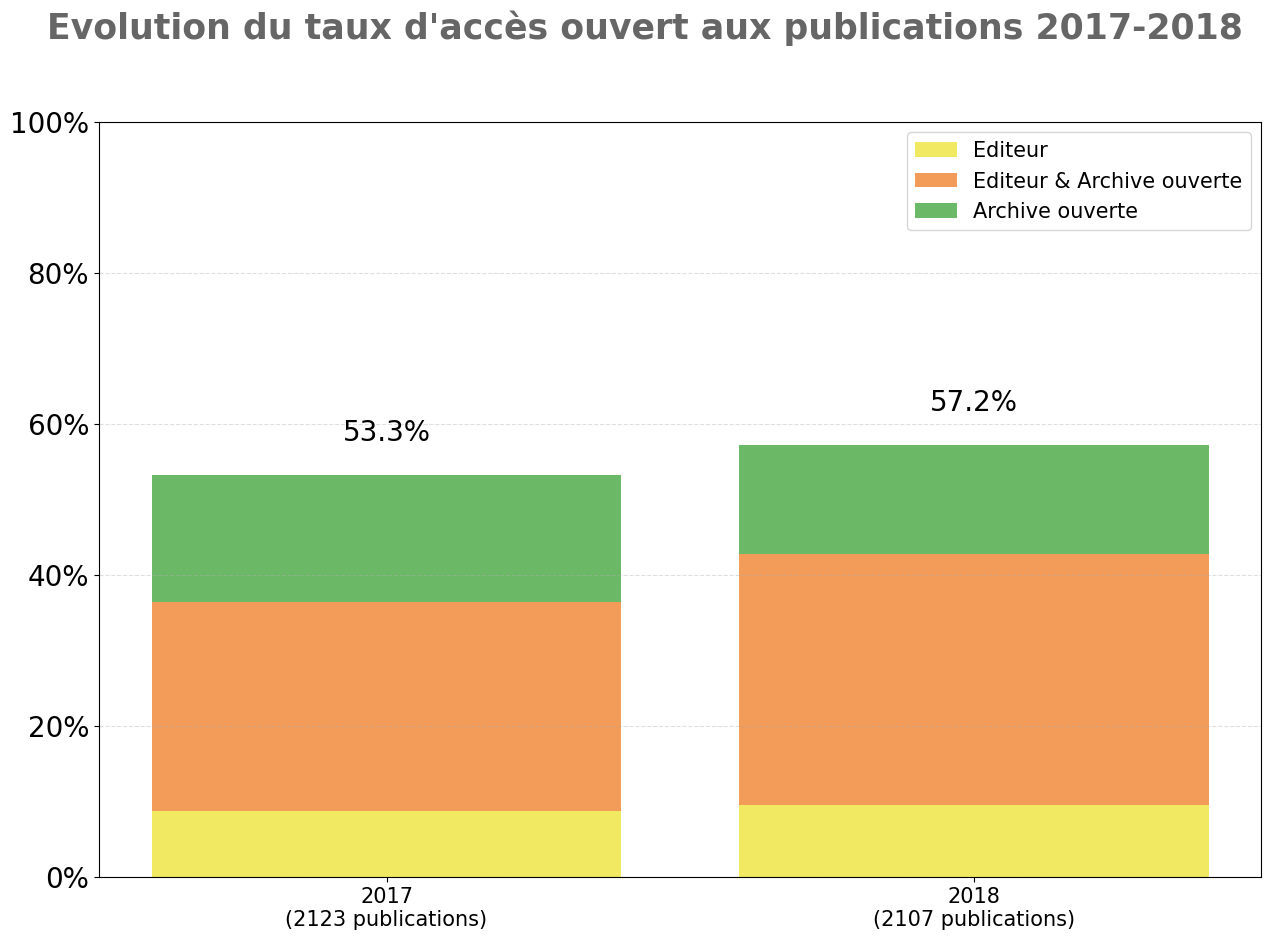

In [9]:
graph_type = 'poster'

if graph_type == 'poster':
    fig, (ax) = plt.subplots(figsize=(15, 10), dpi=100, facecolor='w', edgecolor='k')
else:
    fig, (ax) = plt.subplots(figsize=(10, 12), dpi=100, facecolor='w', edgecolor='k')


years = df_oa_global_year.year_label.tolist()
y_pos = np.arange(len(years))

oa_publisher_repository_mean = df_oa_global_year.oa_publisher_repository_mean.tolist() 
oa_repository_mean = df_oa_global_year.oa_repository_mean.tolist() 
oa_publisher_mean = df_oa_global_year.oa_publisher_mean.tolist() 
oa_unk_mean = df_oa_global_year.oa_unk_mean.tolist()


oa_total_mean = list( map(lambda x,y: x+y, oa_publisher_repository_mean, oa_repository_mean))
oa_total_mean = list( map(lambda x,y: x+y, oa_total_mean, oa_publisher_mean)  )
oa_total_mean = list( map(lambda x,y: x+y, oa_total_mean, oa_unk_mean)  )     


rect1 = ax.bar(y_pos, oa_publisher_mean, align='center', alpha = 1.0, color=colEditor,
        ecolor='black', label="Editeur")

ax.bar(y_pos, oa_publisher_repository_mean, align='center', alpha = 1.0, color=colEdAndOA,
        bottom = oa_publisher_mean,
        ecolor='black', label="Editeur & Archive ouverte")

ax.bar(y_pos, oa_repository_mean, align='center',alpha = 1.0, color=colOA,
       bottom = [oa_publisher_mean[i] + oa_publisher_repository_mean[i] for i in range(0, len(oa_publisher_mean))], 
         ecolor='black', label="Archive ouverte")


w = rect1[0].get_width()

# Lors de l'ajout (ou du retrait) d'une nouvelle année pendant la génération de ce graphique, penser à changer l'intervalle.
# Pour observer la période 2017-2018, il faudra indiquer range(0, 2)
for year_ix in range(0, nb_years):
    ax.annotate("{:,.1%}".format(oa_total_mean[year_ix]),
                        xy=(year_ix , oa_total_mean[year_ix]),
                        xytext=(0, 20),  
                        size=20,
                        textcoords="offset points",
                        ha='center', va='bottom')

ax.set_xticks(y_pos)
ax.set_xticklabels(years, fontsize = 15)
#ax.invert_xaxis()  # labels read top-to-bottom
ax.set_ylim([0,1])
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()], fontsize = 20)
# En cas de taux d'accès ouvert très important, il est préférable de changer la place de la légende pour plus de lisibilité :
# ax.legend(fontsize=15, loc='lower right')
ax.legend(fontsize=15)
ax.yaxis.grid(ls='--', alpha=0.4)

# Ignorer l'avertissement
pd.set_option('mode.chained_assignment', None)

plt.title(graph_title, fontsize = 25, x = 0.47, y = 1.1,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/evolution_oa_annees.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

### <span style="color:green">Graphiques par année</span>

Isoler l'année souhaitée pour tous les graphiques à venir (proportions des publications en accès ouvert, taux par discipline, par éditeur, nombre de publications par type)

In [10]:
#on filtre les données de l'année souhaitée
datas = df_complete.loc[df_complete['published_year'] == 2018.0,:]

Il faut commencer par déterminer les données qui vont être utilisées pour réaliser le graphique : compter le nombre de publications parues en 2018 et les isoler dans la variable "datas". **Bien que ce calcul soit réalisé en 2020, il est plus pertinent d'utiliser les données 2018 que les données 2019 pour ce graphique. En effet, les délais d'embargos pouvant monter jusqu'à 12 mois ne permettent pas de juger en 2020 la réelle ouverture des publications de l'année précédente**.

<span style="color:red">**Pour mettre à jour ce graphique, changer le titre dans la variable rate_title ci-dessous**</span>

### *Proportion des publications en accès ouvert pour une année (mesuré en 2020)*

In [11]:
#titre du graphique
rate_title = 'Proportion des publications 2018 en accès ouvert (mesuré en 2020)'

Définir les deux niveaux dans le graphique : accès ouvert ou non (variable "oa_yes_no"), type d'accès ouvert (variable "type_oa") :

In [12]:
oa_yes_no = datas['is_oa'].value_counts().sort_index()
oa_yes_no = oa_yes_no.rename({ True: 'Accès ouvert global',False: 'Accès fermé global'})
oa_yes_no

Accès fermé global      901
Accès ouvert global    1206
Name: is_oa, dtype: int64

In [13]:
type_oa = datas['oa_type'].value_counts().sort_index()
type_oa = type_oa.rename({'closed': 'Accès fermé', 'publisher' : "Editeur", 'publisher;repository' : 'Editeur & Archive ouverte', 
                         'repository' : 'Archive ouverte'})
type_oa

Accès fermé                  901
Editeur                      200
Editeur & Archive ouverte    701
Archive ouverte              305
Name: oa_type, dtype: int64

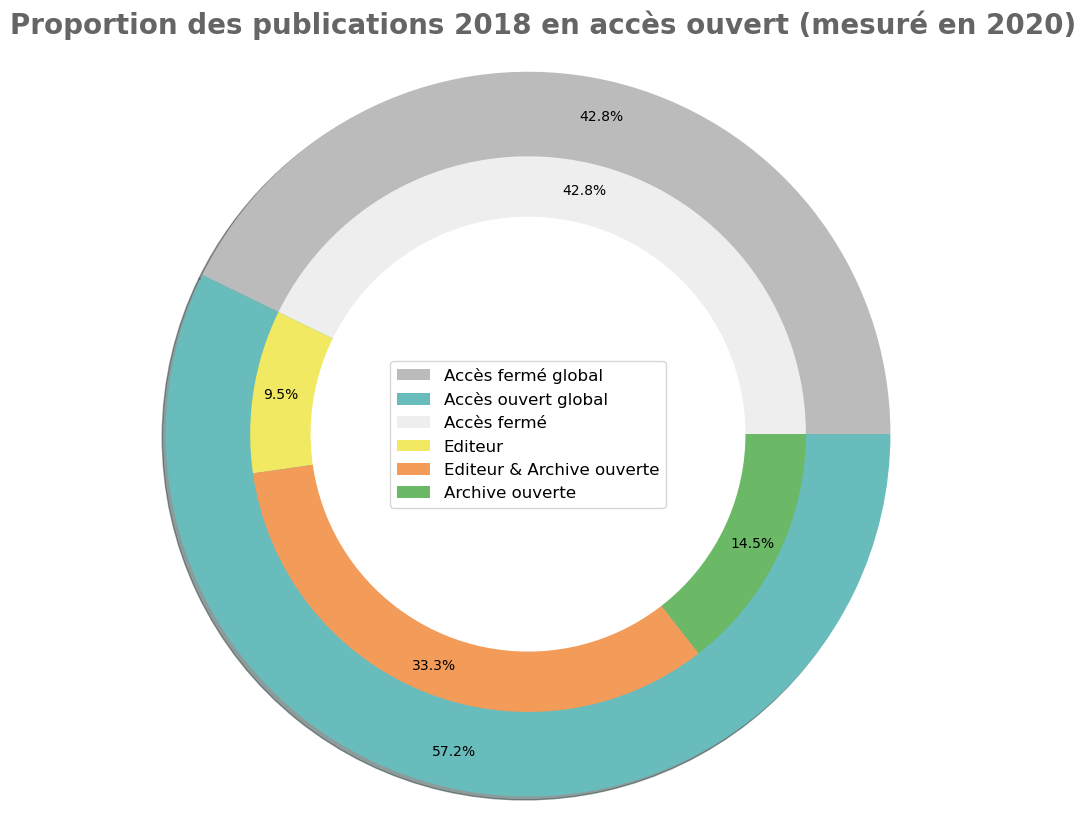

In [14]:
fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.pie(oa_yes_no, labels=oa_yes_no.index, radius=3, labeldistance = None, colors=['#bbb', colGlobal], autopct=lambda x: str(round(x, 1)) + '%', pctdistance = 0.9, shadow = True);
ax.pie(type_oa, labels=type_oa.index, radius=2.3, labeldistance = None,  colors=['#eee',colEditor, colEdAndOA, colOA], autopct=lambda x: str(round(x, 1)) + '%', 
       pctdistance = 0.9);
ax.pie([1], radius=1.8, colors='white');
ax.legend(loc="center", fontsize = 12)
plt.title(rate_title, fontsize = 20, x = 0.55, y = 1.8,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/proportion_publications_oa.png', dpi=150, bbox_inches='tight', pad_inches=0.9)

Il peut être intéressant d'identifier les publications publiées uniquement en accès ouvert "Editeur", pour ensuite déposer ces publications dans une archive ouverte. Pour cela, saisir le code ci-dessous.

In [15]:
publications_ouvertes_editeurs = datas.loc[(datas['oa_type'] == 'publisher')]

Capturer ensuite le résultat dans un fichier. Ici on va utiliser "to_excel" et pas "to_csv" afin d'obtenir un résultat directement lisible par l'humain.

In [16]:
publications_ouvertes_editeurs.to_excel("Data/outputs/publications_ouvertes_editeurs.xls", index=False)

### *Taux d'accès ouvert aux publications par discipline (calculé en 2020)*

Les données du Baromètre n'étant pas encore mise à jour, le taux par discipline pour 2019 ne peut pas encore être visualisé.

<span style="color:red">**Modifier le titre du graphique au niveau de la variable disc_title, ci-dessous.**</span>

In [17]:
#titre du graphique
disc_title = "Taux d'accès ouvert aux publications 2018 par discipline"

**Quelle est la proportion d'accès ouvert, par type d'accès, des publications par discipline dans l'année ?**

In [18]:
publications_par_domaine = datas['scientific_field'].value_counts().sort_index()
publications_par_domaine

Biology (fond.)                                 393
Chemistry                                        81
Computer and \n information sciences             95
Earth, Ecology, \nEnergy and applied biology    255
Engineering                                      43
Humanities                                       63
Mathematics                                      57
Medical research                                695
Physical sciences, Astronomy                    318
Social sciences                                  69
unknown                                          38
Name: scientific_field, dtype: int64

In [19]:
df_oa_discipline_global = pd.crosstab([datas['scientific_field']],datas['oa_type'])
# Ajout d'une colonne avec le total par discipline
df_oa_discipline_global["Total"] = publications_par_domaine
# Ajout d'une colonne qui concatène le nom de la discipline et le total
df_oa_discipline_global["y_label"] = df_oa_discipline_global.index + "\n" + df_oa_discipline_global["Total"].apply(str) \
                                     + " " + "publications"
# Réindexation de l'index pour que les bonnes informations s'affichent dans le graphique final
df_oa_discipline_global.index = df_oa_discipline_global["y_label"]
df_oa_discipline_global

oa_type,closed,publisher,publisher;repository,repository,Total,y_label
y_label,,,,,,
Biology (fond.)\n393 publications,131,20,192,50,393,Biology (fond.)\n393 publications
Chemistry\n81 publications,58,2,11,10,81,Chemistry\n81 publications
Computer and \n information sciences\n95 publications,48,5,6,36,95,Computer and \n information sciences\n95 publi...
"Earth, Ecology, \nEnergy and applied biology\n255 publications",112,19,69,55,255,"Earth, Ecology, \nEnergy and applied biology\n..."
Engineering\n43 publications,31,5,2,5,43,Engineering\n43 publications
Humanities\n63 publications,43,8,7,5,63,Humanities\n63 publications
Mathematics\n57 publications,19,4,14,20,57,Mathematics\n57 publications
Medical research\n695 publications,348,112,166,69,695,Medical research\n695 publications
"Physical sciences, Astronomy\n318 publications",59,11,212,36,318,"Physical sciences, Astronomy\n318 publications"


**Convertir le résultat en pourcentages**

In [20]:
df_oa_discipline = pd.crosstab([datas['scientific_field']],datas['oa_type'])
df_oa_discipline = (df_oa_discipline.T / df_oa_discipline.T.sum()).mul(100).round(1)
df_oa_discipline = df_oa_discipline.T
df_oa_discipline["Total"] = publications_par_domaine
df_oa_discipline["y_label"] = df_oa_discipline.index + "\n" + df_oa_discipline["Total"].apply(str) \
                                     + " " + "publications"
df_oa_discipline.index = df_oa_discipline["y_label"]
df_oa_discipline = df_oa_discipline.sort_values(by='repository', ascending=True)

**Générer le graphique**

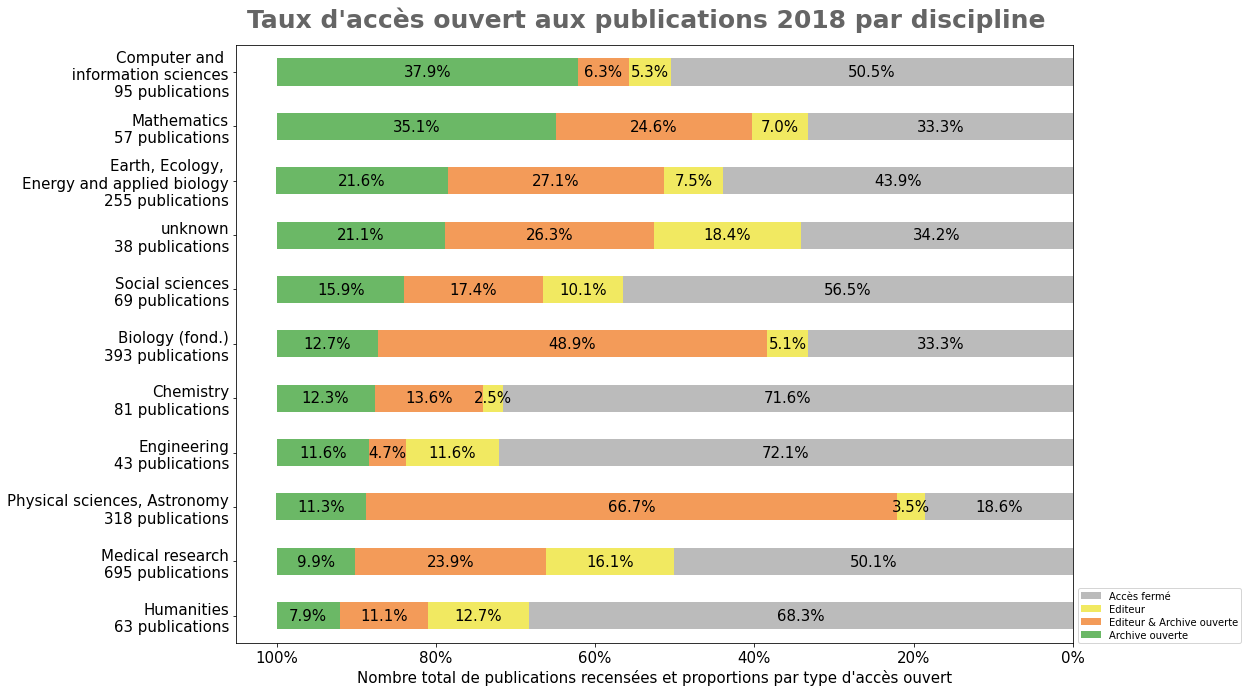

In [21]:
import matplotlib.ticker as mtick

ax = df_oa_discipline.drop(["Total", "y_label"], axis=1).plot(kind="barh", stacked=True, figsize=(15, 11), color=['#bbb', colEditor, colEdAndOA, colOA])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

labels = []
for j in df_oa_discipline.columns:
    for i in df_oa_discipline.index:
        label = str(df_oa_discipline.loc[i][j]) + "%"
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=15)

# Trier les disciplines par ordre alphabétique
#plt.gca().invert_yaxis()

#taux d'oa en premier sur l'axe x
plt.gca().invert_xaxis()

plt.tick_params(axis = 'both', labelsize = 15)

plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=15)  
plt.ylabel(None, fontsize = 13)

# Les légendes sont nativement en anglais. Elles ont été renommées ici, mais attention, pour une réutilisation avec d'autres
# données, il est conseillé d'enlever cette liste ["Accès fermé", "Editeur"...] et de générer le graphique une 1ère
# fois pour voir quels types de documents ressortent et dans quel ordre. On peut toujours renommer la légende dans un 2ème 
# temps.
plt.legend(['Accès fermé', 'Editeur', 'Editeur & Archive ouverte', 'Archive ouverte'],
              loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
              borderpad = 0.3, labelspacing = 0.3, bbox_to_anchor=(1, 0.1))

plt.title(disc_title, fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/taux_type_oa_discipline.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

### *Taux d'accès ouvert aux publications par éditeur / préfixe DOI (calculé en 2020)*

Le Baromètre du Mnistère montre le taux d'accès ouvert aux publications par éditeur, ce qui a du sens au niveau national. Mais au niveau local, il semble plus judicieux de regarder auprès de quels éditeurs publient en majorité les chercheurs, puis de regarder ces éditeurs de plus près.

<span style="color:red">**Pour mettre à jour ce graphique, modifier le titre du graphique au niveau de la variable editor_title.**</span>

**Isoler les publications de l'année 2018**

In [22]:
editor_title = "Taux d'accès ouvert aux publications 2018 par éditeur/plateforme"

**Voir quels sont les 20 éditeurs majoritaires au sein de la production de l'Université Clermont Auvergne**

In [23]:
publications_par_editeur = datas['publisher'].value_counts().iloc[0:20]
publications_par_editeur

Elsevier BV                                                 688
Springer Science and Business Media LLC                     327
Wiley                                                       142
American Physical Society (APS)                              75
Informa UK Limited                                           51
Frontiers Media SA                                           48
Ovid Technologies (Wolters Kluwer Health)                    41
Oxford University Press (OUP)                                41
MDPI AG                                                      40
CAIRN                                                        37
OpenEdition                                                  37
Copernicus GmbH                                              36
American Chemical Society (ACS)                              28
Royal Society of Chemistry (RSC)                             28
Public Library of Science (PLoS)                             26
Springer International Publishing       

On remarque ici qu'il y a parfois des doublons : par exemple, IEEE apparaît une fois sous la forme "IEEE", une fois sous la forme "Institute of Electrical and Electronics Engineers (IEEE). Ce doublon provient de l'API Unpaywall et ne peut donc être corrigé ici. En comparant les taux d'accès ouvert de ces deux "éditeurs" (qui est en réalité le même), on peut voir qu'ils sont très proches. Il n'est donc pas nécessaire de le reprendre dans la liste ci-dessous, au risque de provoquer de la confusion. "Springer Science and Business Media LLC" n'est en revanche pas un doublon de "Springer International Publishing".

**Choisir les éditeurs voulus**

Un graphique présentant le taux d'accès ouvert pour chaque éditeur deviendrait illisible. Pour l'Université de Lorraine par exemple, près de 250 éditeurs sont concernés. Pour des raisons de lisibilité du graphique, seuls les 20 éditeurs ou les plateformes les plus représentés au sein des publications 2018 sont donc repris ici ; mais si l'on s'intéresse à d'autres éditeurs, il suffit de modifier ou d'ajouter leur nom dans le code ci-dessous.

In [24]:
#filter = ['Elsevier BV', 'Springer Science and Business Media LLC', 'Wiley', 'Springer International Publishing',
#         'IEEE', 'IOP Publishing', 'MDPI AG', 'American Chemical Society (ACS)', 'Oxford University Press (OUP)',
#         'Informa UK Limited', 'AIP Publishing','Ovid Technologies (Wolters Kluwer Health)', 'EDP Sciences',
#         'Royal Society of Chemistry (RSC)', 'CAIRN', 'Frontiers Media SA', 'American Physical Society (APS)',
#        'OpenEdition', 'International Union of Crystallography (IUCr)'] 
filter = ['Elsevier BV', 'Springer Science and Business Media LLC', 'Wiley', 'American Physical Society (APS)',
          'Informa UK Limited', 'Frontiers Media SA', 'Oxford University Press (OUP)'
          , 'MDPI AG', 'Copernicus GmbH', 'Royal Society of Chemistry (RSC)',
          'American Chemical Society (ACS)', 'Public Library of Science (PLoS)', 'Springer International Publishing', 'American Society of Hematology',
          'Cambridge University Press (CUP)', 'EDP Sciences', 'Institute of Electrical and Electronics Engineers (IEEE)'
         ] 
editeurs = datas[datas['publisher'].isin(filter)]

**Quelle est la proportion d'accès ouvert, par type d'accès, des publications par éditeur dans l'année ?**

In [25]:
df_oa_editeur_global = pd.crosstab([editeurs['publisher']], editeurs['oa_type'])
df_oa_editeur_global["Total"] = publications_par_editeur
df_oa_editeur_global["y_label"] = df_oa_editeur_global.index + " - " + df_oa_editeur_global["Total"].apply(str) \
                                     + " " + "publications"
df_oa_editeur_global.index = df_oa_editeur_global["y_label"]
df_oa_editeur_global.sort_values(by='repository', ascending=False)

oa_type,closed,publisher,publisher;repository,repository,Total,y_label
y_label,,,,,,
Elsevier BV - 688 publications,446,58,78,106,688,Elsevier BV - 688 publications
Springer Science and Business Media LLC - 327 publications,88,6,199,34,327,Springer Science and Business Media LLC - 327 ...
Wiley - 142 publications,63,26,30,23,142,Wiley - 142 publications
Springer International Publishing - 26 publications,15,0,0,11,26,Springer International Publishing - 26 publica...
Oxford University Press (OUP) - 41 publications,8,9,15,9,41,Oxford University Press (OUP) - 41 publications
American Chemical Society (ACS) - 28 publications,18,3,1,6,28,American Chemical Society (ACS) - 28 publications
Informa UK Limited - 51 publications,28,5,12,6,51,Informa UK Limited - 51 publications
American Physical Society (APS) - 75 publications,2,2,67,4,75,American Physical Society (APS) - 75 publications
Institute of Electrical and Electronics Engineers (IEEE) - 14 publications,10,0,0,4,14,Institute of Electrical and Electronics Engine...


**Convertir le résultat en pourcentages**

In [26]:
df_oa_editeur = pd.crosstab([editeurs['publisher']],editeurs['oa_type'])
df_oa_editeur = (df_oa_editeur.T / df_oa_editeur.T.sum()).mul(100).round(1)
df_oa_editeur = df_oa_editeur.T
df_oa_editeur["Total"] = publications_par_editeur
df_oa_editeur["y_label"] = df_oa_editeur.index + " - " + df_oa_editeur["Total"].apply(str) \
                                     + " " + "publications"
df_oa_editeur.index = df_oa_editeur["y_label"]
df_oa_editeur = df_oa_editeur.sort_values(by='repository', ascending=False)
df_oa_editeur

oa_type,closed,publisher,publisher;repository,repository,Total,y_label
y_label,,,,,,
Springer International Publishing - 26 publications,57.7,0.0,0.0,42.3,26,Springer International Publishing - 26 publica...
Institute of Electrical and Electronics Engineers (IEEE) - 14 publications,71.4,0.0,0.0,28.6,14,Institute of Electrical and Electronics Engine...
Oxford University Press (OUP) - 41 publications,19.5,22.0,36.6,22.0,41,Oxford University Press (OUP) - 41 publications
American Chemical Society (ACS) - 28 publications,64.3,10.7,3.6,21.4,28,American Chemical Society (ACS) - 28 publications
Wiley - 142 publications,44.4,18.3,21.1,16.2,142,Wiley - 142 publications
Elsevier BV - 688 publications,64.8,8.4,11.3,15.4,688,Elsevier BV - 688 publications
Royal Society of Chemistry (RSC) - 28 publications,67.9,3.6,14.3,14.3,28,Royal Society of Chemistry (RSC) - 28 publicat...
Cambridge University Press (CUP) - 22 publications,36.4,18.2,31.8,13.6,22,Cambridge University Press (CUP) - 22 publicat...
Informa UK Limited - 51 publications,54.9,9.8,23.5,11.8,51,Informa UK Limited - 51 publications


**Générer le graphique**

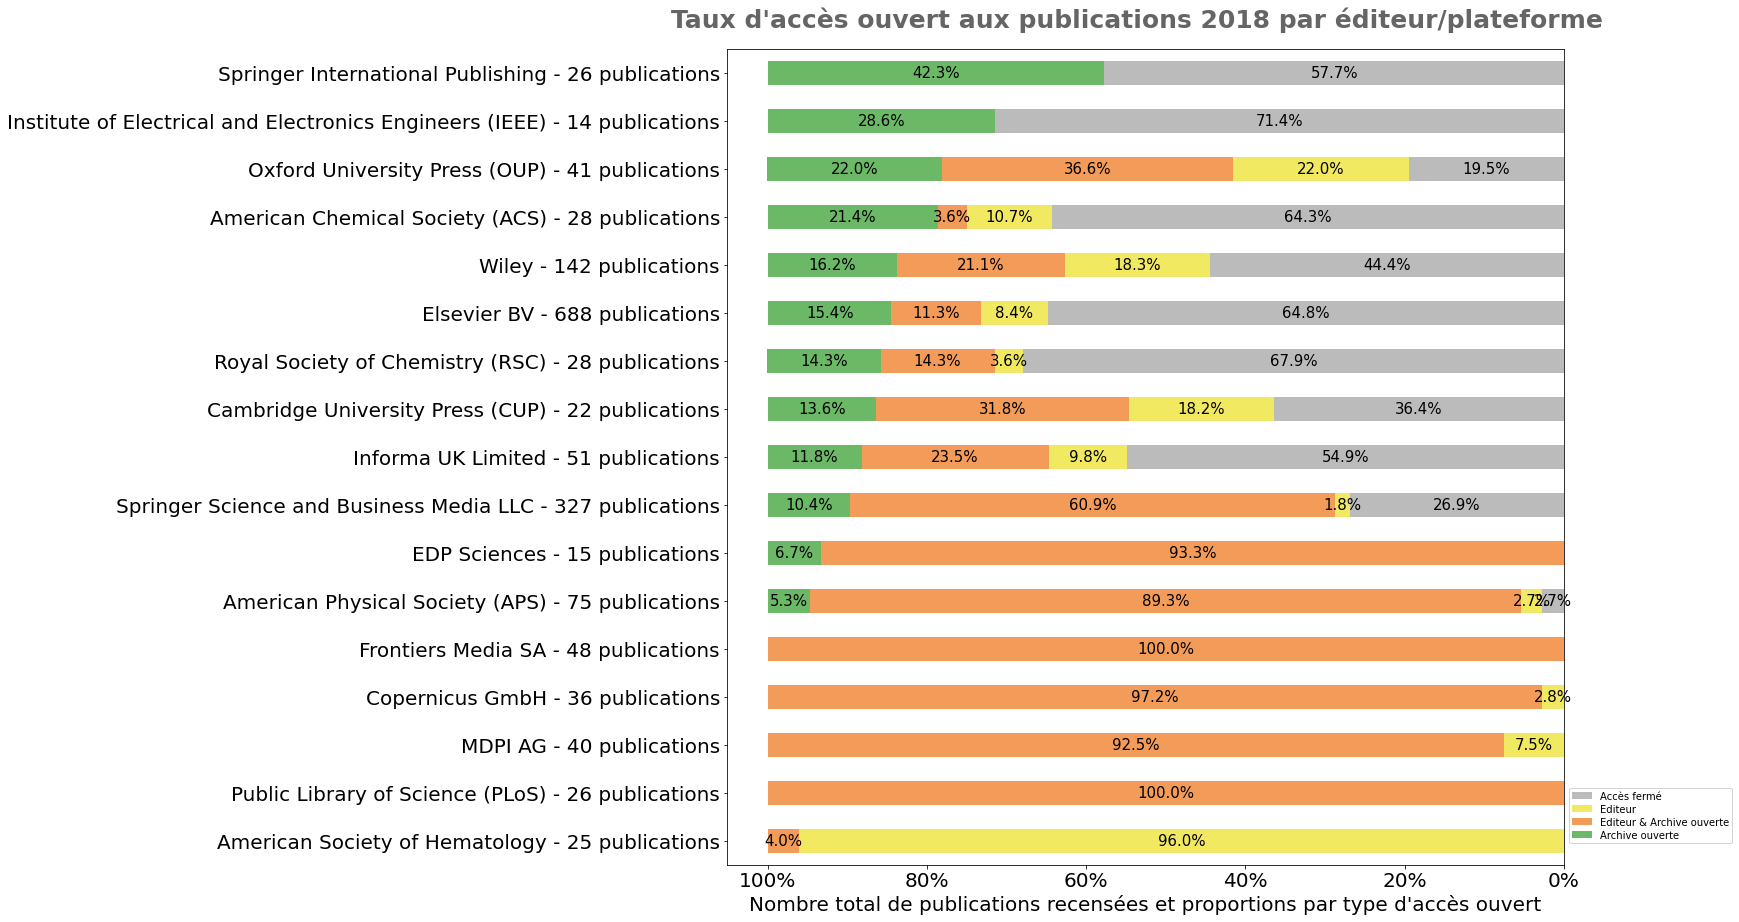

In [27]:
import matplotlib.ticker as mtick

ax = df_oa_editeur.drop(["Total", "y_label"], axis=1).plot(kind="barh", stacked=True, figsize=(15, 15), color=['#bbb', colEditor, colEdAndOA, colOA])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

labels = []
for j in df_oa_editeur.columns:
    for i in df_oa_editeur.index:
        label = str(df_oa_editeur.loc[i][j]) + "%"
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=15)
        
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.tick_params(axis = 'both', labelsize = 20)

plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=20)  
plt.ylabel(None, fontsize = 15)

# Les légendes sont nativement en anglais. Elles ont été renommées ici, mais attention, pour une réutilisation avec d'autres
# données, il est conseillé d'enlever cette liste ["Accès fermé", "Editeur"...] et de générer le graphique une 1ère
# fois pour voir quels types de documents ressortent et dans quel ordre. On peut toujours renommer la légende dans un 2ème 
# temps.

plt.legend(['Accès fermé', 'Editeur', 'Editeur & Archive ouverte', 'Archive ouverte'],
             loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
              borderpad = 0.3, labelspacing = 0.3, bbox_to_anchor=(1, 0.1))

plt.title(editor_title, fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
plt.savefig('Data/outputs/taux_type_oa_editeur.png', dpi=100, bbox_inches='tight', pad_inches=0.9)


### *Répartition des publications par type de publication et type d'accès (mesuré en 2019)*

<span style="color:red">**Pour mettre à jour ce graphique, changer l'année ci-dessous et modifier le titre du graphique au niveau de la fonction plt.title.**</span>

**titre du graphique et selection des types à afficher**

In [32]:
#publications_2018 = df_complete.loc[df_complete['published_year'] == 2018.0,:]
type_title = 'Nombre d\'articles 2018 répartis par accès'
legend = [ 'Articles de revue']
#type_title = 'Autres publications 2018 réparties par accès et par type'
#legend = [ "Ouvrages", "Chapitre d'ouvrage", "Communications", 'Autres']

#ouvrages = A6D2B0
#chapitres = B59ECB
#comm. = EED869
#autres = F199BF
#articles = EF8081
#typeColors = ['#A6D2B0', '#B59ECB', '#EED869', '#F199BF']
typeColors = ['#EF8081']

#on filtre les données pour garder que les types voulus
#filter = ['book', 'book-chapter', 'proceedings-article', 'other']
filter = ['journal-article']

#typeFileName = 'Data/outputs/taux_type_oa_type_others.png'
typeFileName = 'Data/outputs/taux_type_oa_type_article.png'

In [33]:


publis_by_type = datas[datas['genre'].isin(filter)]

publis_by_type.to_excel("Data/outputs/publications_by_type.xls", index=False)

**Trier les publications par type de publication et par accès, ouvert ou fermé**

In [34]:
df_oa_by_type = pd.crosstab([publis_by_type['is_oa']],publis_by_type['genre'])
df_oa_by_type = df_oa_by_type.rename({'False': 'Accès fermé', 'True' : "Accès ouvert"})
df_oa_by_type

genre,journal-article
is_oa,
False,848
True,1165


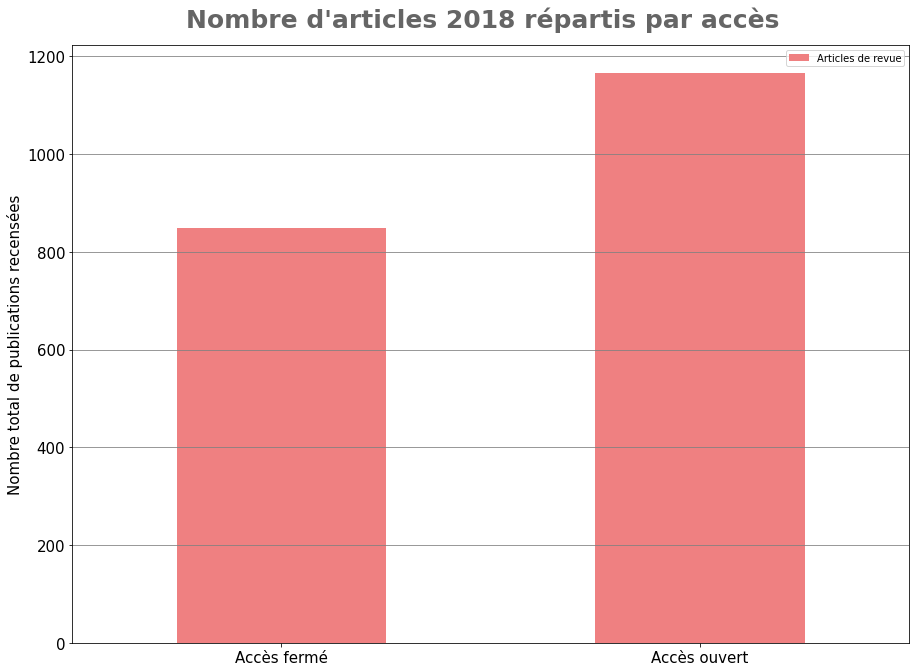

In [35]:
ax = df_oa_by_type.plot(kind="bar", stacked=True, figsize=(15, 11), rot=0, color = typeColors)

# Les couleurs ci-dessus peuvent être changées en choisissant parmi les codes suivants : http://www.python-simple.com/img/img44.png
ax.set_xticklabels(('Accès fermé', 'Accès ouvert'))

plt.xlabel(None)  
plt.ylabel("Nombre total de publications recensées", fontsize=15)

axes = plt.gca()

plt.gca().yaxis.grid(True, which = 'both', color = 'gray', zorder = 0)
plt.tick_params(axis = 'both', labelsize = 15)

# Les légendes sont nativement en anglais. Elles ont été renommées ici, mais attention, pour une réutilisation avec d'autres
# données, il est conseillé d'enlever cette liste ["Ouvrage", "Chapitre d'ouvrage"...] et de générer le graphique une 1ère
# fois pour voir quels types de documents ressortent et dans quel ordre. On peut toujours renommer la légende dans un 2ème 
# temps.

#plt.legend(["Ouvrage", "Chapitre d'ouvrage", "Article de revue", "Autres", "Communication avec acte"],
#              loc = 'best', ncol = 1,
#              frameon = True, markerscale = 2, title = None,
#              borderpad = 0.3, labelspacing = 0.3)
plt.legend( legend,
             loc = 'best', ncol = 1,
             frameon = True, markerscale = 2, title = None,
             borderpad = 0.3, labelspacing = 0.3)

plt.title(type_title, fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
plt.savefig(typeFileName, dpi=100, bbox_inches='tight', pad_inches=0.9)